## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import datetime
import quandl

In [3]:
#Google API

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [4]:
#Stocker Experience
#Refer to https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker?source=post_page---------------------------

from stocker import Stocker

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Importing Dataset

In [5]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 00:00:00 to 2018-03-27 00:00:00.


In [6]:
# Stock is an attribute of the microsoft object
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


## Data Visualization

Maximum Adj. Close = 96.77 on 2018-03-12 00:00:00.
Minimum Adj. Close = 0.06 on 1986-03-24 00:00:00.
Current Adj. Close = 89.47 on 2018-03-27 00:00:00.



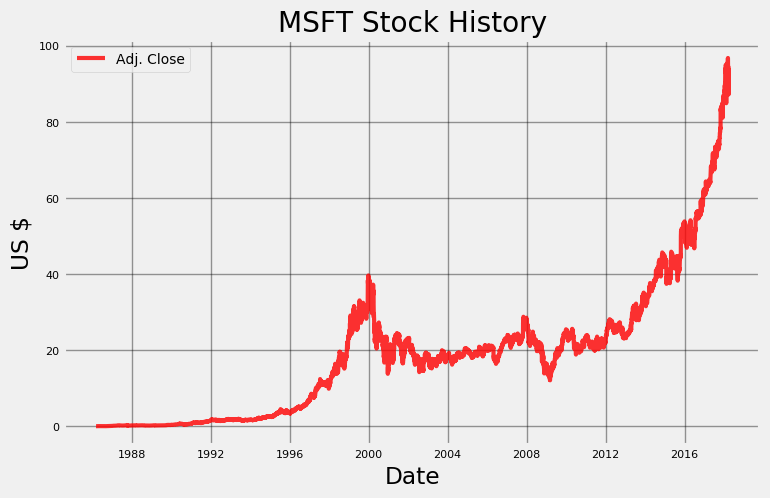

In [7]:
# A method (function) requires parentheses
microsoft.plot_stock()

Maximum Daily Change = 2.08 on 2008-10-13 00:00:00.
Minimum Daily Change = -3.34 on 2017-12-04 00:00:00.
Current Daily Change = -5.47 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 591052200.00 on 2006-04-28 00:00:00.
Minimum Adj. Volume = 7425503.00 on 2017-11-24 00:00:00.
Current Adj. Volume = 53704562.00 on 2018-03-27 00:00:00.



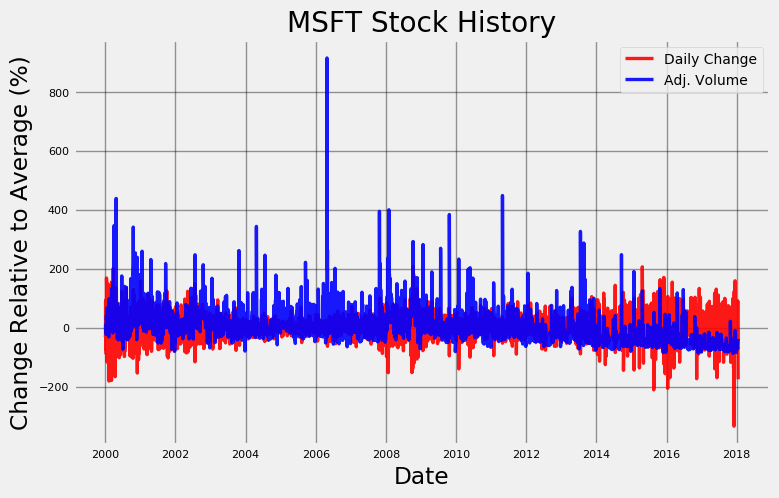

In [8]:
microsoft.plot_stock(start_date = '2000-01-03',  end_date = '2018-01-16',  stats = ['Daily Change', 'Adj. Volume'],  plot_type='pct')

MSFT Total buy and hold profit from 1986-03-13 00:00:00 to 2018-01-16 00:00:00 for 100 shares = $8829.11


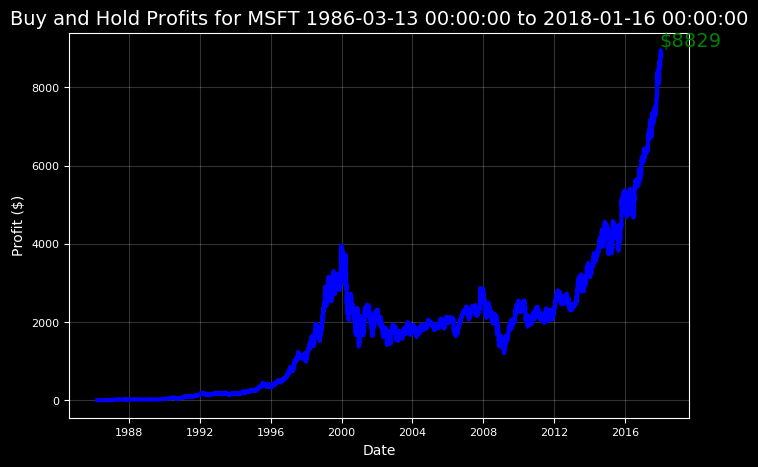

In [9]:
microsoft.buy_and_hold(start_date='1986-03-13', 
                       end_date='2018-01-16', nshares=100)

MSFT Total buy and hold profit from 1999-01-05 00:00:00 to 2002-01-03 00:00:00 for 100 shares = $-56.92


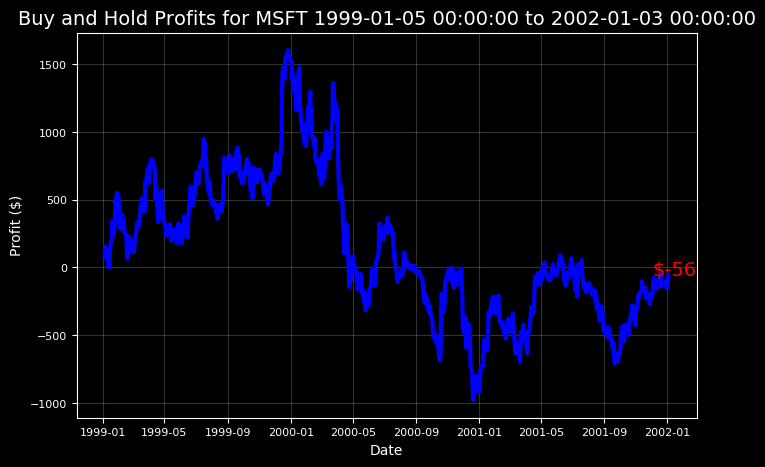

In [10]:
microsoft.buy_and_hold(start_date='1999-01-05', 
                      end_date='2002-01-03', nshares=100)

## Data Modeling

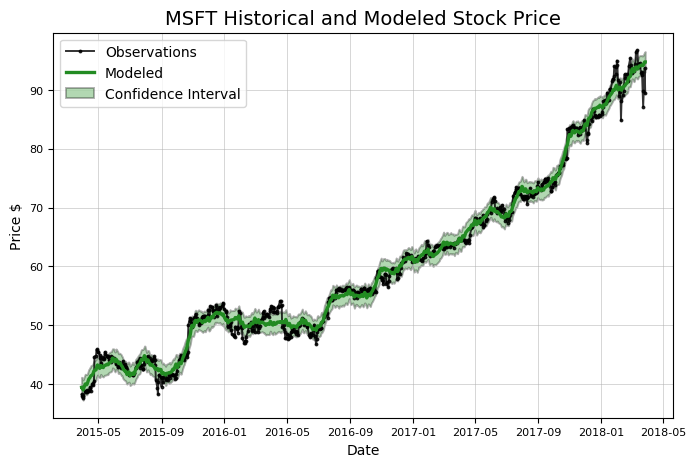

In [11]:
model, model_data = microsoft.create_prophet_model()


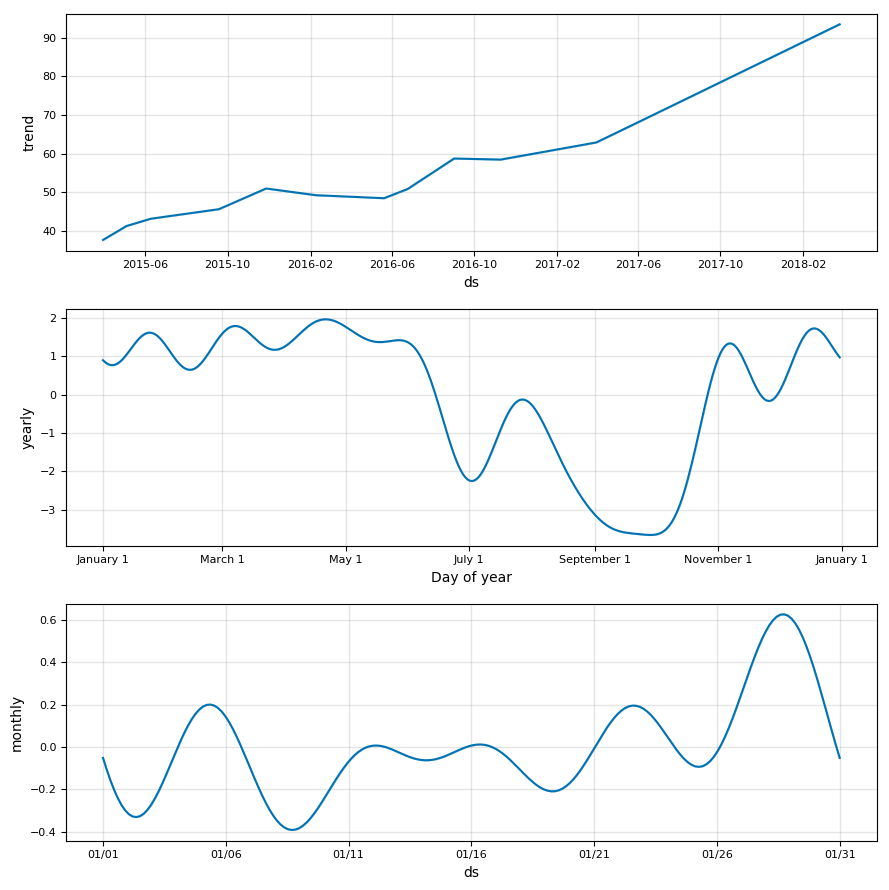

In [12]:
# model and model_data are from previous method call
model.plot_components(model_data)
plt.show()

In [13]:
print(microsoft.weekly_seasonality)

False


In [14]:
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

True



Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
361 2016-09-01   55.966886 -1.332496
169 2015-11-27   51.353167 -1.127296
289 2016-05-20   48.886934  0.889891
120 2015-09-18   41.122995  0.579474
506 2017-03-31   64.816957  0.529170


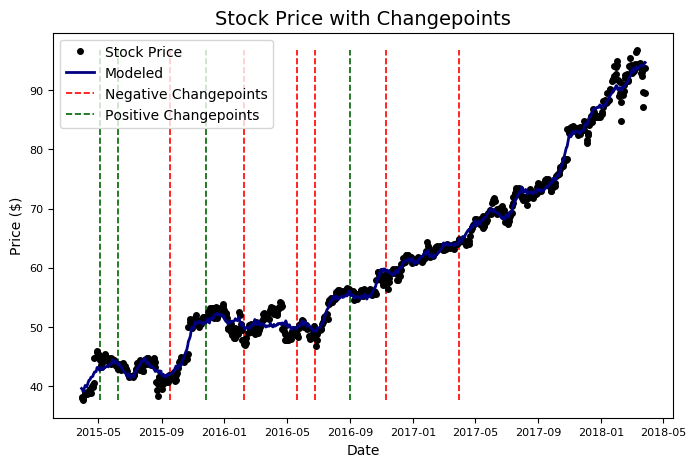

In [15]:
microsoft.changepoint_date_analysis()

## Predicting Stocks 

Predicted Price on 2019-11-17 00:00:00 = $144.95


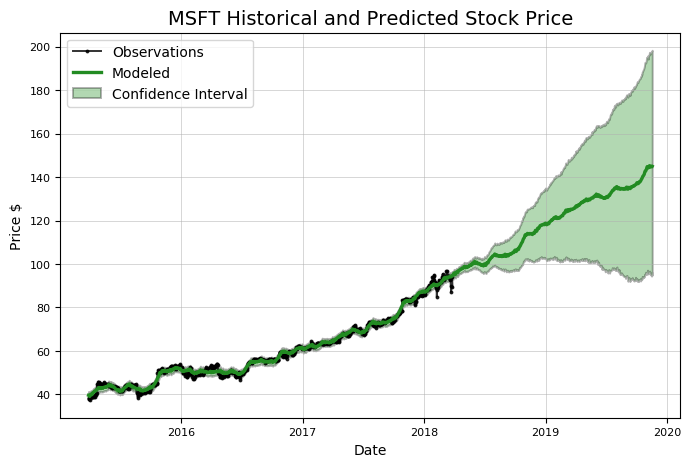

In [16]:
# specify number of days in future to make a prediction
model, future = microsoft.create_prophet_model(days=600)